In [171]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing

# Fetching Dataset and performing scaling

In [198]:
X,y=fetch_california_housing(as_frame=True,return_X_y=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

#X_combined=pd.DataFrame(pd.concat([X_train,X_test])).reset_index(drop=True)
#y_combined=pd.DataFrame(pd.concat([y_train,y_test])).reset_index(drop=True)

#df=pd.concat([X_combined,y_combined],axis=1)

# Checking for Multicoliinearity

In [199]:
def collinearity_check(df,threshold=0.85):
    df=df.select_dtypes(include=['number'])
    collinear_matrix=abs(df.corr())
    removed_cols=set()
    for i in range(len(collinear_matrix.columns)):
        for j in range(i):
            if collinear_matrix.iloc[i,j]>threshold:
                removed_cols.add(collinear_matrix.columns[i])
    return(removed_cols)

cols=collinearity_check(X_train)
X_train=X_train.drop(columns=cols,axis=1)
X_test=X_test.drop(columns=cols,axis=1)

cols
#fig=plt.figure(figsize=(24,20))

#cols=X.columns
#for i in range(len(cols)):
#    plt.subplot(3,3,i+1)
#    plt.xlabel(cols[i])
#    plt.ylabel('Price')
#    plt.scatter(X[X.columns[i]],y)

{'Longitude'}

# Linear Model

0.7981366608800815

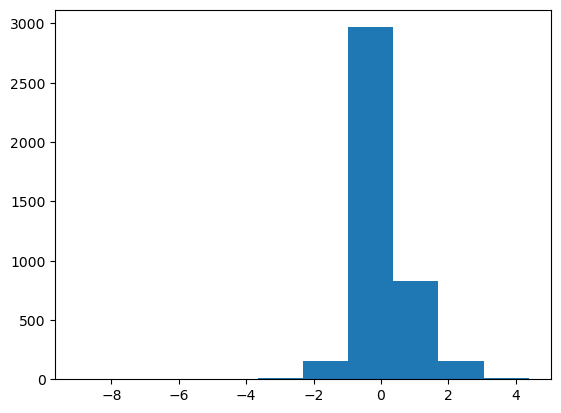

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
residual=y_test-y_pred

plt.hist(residual)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse